In [19]:
import matplotlib.pyplot as plt
import numpy as np
import os

from sklearn.datasets import load_files
from pyvi import ViTokenizer
from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

%matplotlib inline

In [6]:
# Định nghĩa đường dẫn tới dữ liệu
DATA_PATH = "data/news_vnexpress/"

# Tải dữ liệu từ thư mục chứa các văn bản
data_train = load_files(container_path=DATA_PATH, encoding="utf-8")

# Hiển thị danh sách nhãn có trong dữ liệu
print("Danh sách các nhãn:", data_train.target_names)


Danh sách các nhãn: ['doi-song', 'du-lich', 'giai-tri', 'giao-duc', 'khoa-hoc', 'kinh-doanh', 'phap-luat', 'suc-khoe', 'the-thao', 'thoi-su']


In [5]:
# Khởi tạo bộ chuyển đổi TF-IDF
vectorizer = Pipeline([
    ('vect', CountVectorizer(stop_words="english")),  # Loại bỏ từ dừng
    ('tfidf', TfidfTransformer()),  # Chuyển thành ma trận TF-IDF
])

# Áp dụng vectorizer lên dữ liệu
X = vectorizer.fit_transform(data_train.data)
y = data_train.target

# Hiển thị kích thước dữ liệu sau khi xử lý
print(f"Số lượng văn bản: {X.shape[0]}, Số từ đặc trưng: {X.shape[1]}")


Số lượng văn bản: 1339, Số từ đặc trưng: 12947


In [7]:
# Chia dữ liệu thành 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Kích thước tập train:", X_train.shape)
print("Kích thước tập test:", X_test.shape)


Kích thước tập train: (1071, 12947)
Kích thước tập test: (268, 12947)


In [8]:
# Khởi tạo mô hình SVM với kernel tuyến tính
model = svm.SVC(kernel='linear', C=1.0)

# Huấn luyện mô hình trên tập train
print("- Đang huấn luyện mô hình SVM ...")
model.fit(X_train, y_train)
print("- Hoàn thành huấn luyện")


- Đang huấn luyện mô hình SVM ...
- Hoàn thành huấn luyện


In [21]:
# Dự đoán
y_pred = model.predict(X_test)

# Tính độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print(f"Độ chính xác của mô hình: {accuracy:.4f}")


Độ chính xác của mô hình: 0.9179


In [10]:
# Văn bản mới cần phân loại
news = ["Công Phượng ghi bàn thắng giúp đội tuyển Việt Nam chiến thắng"]

# Tiền xử lý và chuyển đổi thành dạng vector
news_vectorized = vectorizer.transform(news)

# Dự đoán nhãn
pred = model.predict(news_vectorized)

# Hiển thị kết quả
print(f"Văn bản thuộc nhãn: {data_train.target_names[pred[0]]}")


Văn bản thuộc nhãn: the-thao


### Làm phương án 2 (chưa bt đúng k), Chờ thầy sửa

In [11]:
import os
from sklearn.datasets import load_files

# Định nghĩa đường dẫn tới dữ liệu
DATA_PATH = "data/news_vnexpress/"

# In thông tin về số lượng văn bản trong từng nhãn
header = "%-20s%-30s" % ("Số lượng văn bản", "Nhãn")
print(header)
print("-" * 50)

total = 0
for label in os.listdir(DATA_PATH):
    n = len(os.listdir(os.path.join(DATA_PATH, label)))
    total += n
    entry = "%-20d%-30s" % (n, label)
    print(entry)

print("-" * 50)
print(f"Tổng số văn bản: {total}")

# Load dữ liệu văn bản
data_train = load_files(container_path=DATA_PATH, encoding="utf-8")

# Hiển thị danh sách các nhãn
print(data_train.target_names)


Số lượng văn bản    Nhãn                          
--------------------------------------------------
120                 doi-song                      
54                  du-lich                       
201                 giai-tri                      
105                 giao-duc                      
144                 khoa-hoc                      
262                 kinh-doanh                    
59                  phap-luat                     
162                 suc-khoe                      
173                 the-thao                      
59                  thoi-su                       
--------------------------------------------------
Tổng số văn bản: 1339
['doi-song', 'du-lich', 'giai-tri', 'giao-duc', 'khoa-hoc', 'kinh-doanh', 'phap-luat', 'suc-khoe', 'the-thao', 'thoi-su']


In [12]:
# Đọc danh sách stopwords tiếng Việt
with open("data/vietnamese-stopwords.txt", encoding='utf-8') as f:
    stopwords = f.readlines()

# Chuẩn hóa danh sách stopwords
stopwords = [x.strip().replace(" ", "_") for x in stopwords]

print(f"Tổng số lượng từ dừng: {len(stopwords)}")
print("10 từ dừng đầu tiên:", stopwords[:10])


Tổng số lượng từ dừng: 2063
10 từ dừng đầu tiên: ['a_lô', 'a_ha', 'ai', 'ai_ai', 'ai_nấy', 'ai_đó', 'alô', 'amen', 'anh', 'anh_ấy']


In [13]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline

# Tạo pipeline để tiền xử lý dữ liệu
module_count_vector = CountVectorizer(stop_words=stopwords)
model_rf_preprocess = Pipeline([
    ('vect', module_count_vector),
    ('tfidf', TfidfTransformer()),
])

# Chuyển đổi dữ liệu văn bản thành dạng ma trận
data_preprocessed = model_rf_preprocess.fit_transform(data_train.data, data_train.target)

# Hiển thị kích thước dữ liệu sau khi chuyển đổi
print(f"Số chiều của dữ liệu: {data_preprocessed.shape}")


Số chiều của dữ liệu: (1339, 12796)


In [14]:
from sklearn.model_selection import train_test_split

# Chia dữ liệu thành train và test (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(
    data_preprocessed, data_train.target, test_size=0.2, random_state=42
)

# Hiển thị kích thước dữ liệu sau khi chia
print("Dữ liệu training =", X_train.shape, y_train.shape)
print("Dữ liệu testing =", X_test.shape, y_test.shape)


Dữ liệu training = (1071, 12796) (1071,)
Dữ liệu testing = (268, 12796) (268,)


In [15]:
from sklearn import svm

# Khởi tạo mô hình SVM
model = svm.SVC(kernel='linear', C=1.0)

# Huấn luyện mô hình
print("- Training ...")
model.fit(X_train, y_train)
print("- Model train complete")


- Training ...
- Model train complete


In [16]:
from sklearn.metrics import accuracy_score

# Dự đoán trên tập kiểm tra
print("- Testing ...")
y_pred = model.predict(X_test)

# Tính độ chính xác
acc = accuracy_score(y_test, y_pred)
print(f"- Accuracy = {acc:.4f}")


- Testing ...
- Accuracy = 0.9179


In [17]:
# Văn bản mới cần phân loại
news = ["Công Phượng ghi bàn cho đội tuyển Việt Nam"]

# Tiền xử lý dữ liệu
preprocessed_news = model_rf_preprocess.transform(news)

# Dự đoán nhãn
pred = model.predict(preprocessed_news)

# Hiển thị kết quả
print(f"Văn bản thuộc nhãn: {data_train.target_names[pred[0]]}")


Văn bản thuộc nhãn: the-thao


In [18]:
# Kiểm tra số lượng văn bản trong tập dữ liệu
num_documents = len(data_train.data)
print(f"Số lượng văn bản trong data_train.data: {num_documents}")

# Kiểm tra số lượng nhãn (target)
num_targets = len(data_train.target)
print(f"Số lượng ids trong data_train.target: {num_targets}")

# Kiểm tra số lượng filenames
num_filenames = len(data_train.filenames)
print(f"Số lượng filenames trong data_train.filenames: {num_filenames}")


Số lượng văn bản trong data_train.data: 1339
Số lượng ids trong data_train.target: 1339
Số lượng filenames trong data_train.filenames: 1339


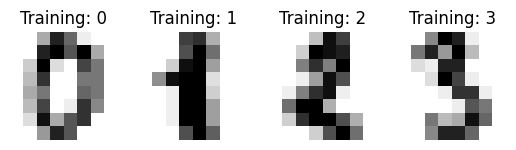

In [18]:
# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
# Hiển thị 4 ảnh đầu tiên trong tập dữ liệu
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
target = digits.target


In [19]:
"""Bài tập
 - Đánh giá các tham số của mô hình SVM với bài toán phân loại ảnh
 - Gợi ý: Làm tương tự với phân loại văn bản phía trên
"""
######################
print("- Training ...")


# X_train.shape
print("- Train size = {}".format(X_train.shape))
model = svm.SVC(kernel='linear', C=1.0)
model.fit(X_train, y_train)

print("- model - train complete")

from sklearn.metrics import accuracy_score
print("- Testing ...")
y_pred = model.predict(X_test)
print("- Acc = {}".format(accuracy_score(y_test, y_pred)))


- Training ...
- Train size = (1071, 12947)
- model - train complete
- Testing ...
- Acc = 0.9402985074626866
